In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
# reading data files and storing them in a dataframe
df = pd.read_csv('Downloads/Features_Variant_1.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40948 entries, 0 to 40947
Data columns (total 54 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   634995       40948 non-null  int64  
 1   0            40948 non-null  int64  
 2   463          40948 non-null  int64  
 3   1            40948 non-null  int64  
 4   0.1          40948 non-null  int64  
 5   806          40948 non-null  int64  
 6   11.29104478  40948 non-null  float64
 7   1.1          40948 non-null  float64
 8   70.49513846  40948 non-null  float64
 9   0.2          40948 non-null  int64  
 10  806.1        40948 non-null  int64  
 11  7.574626866  40948 non-null  float64
 12  0.3          40948 non-null  float64
 13  69.43582637  40948 non-null  float64
 14  0.4          40948 non-null  int64  
 15  76           40948 non-null  int64  
 16  2.604477612  40948 non-null  float64
 17  0.5          40948 non-null  float64
 18  8.505501869  40948 non-null  float64
 19  0.6 

In [7]:
df.columns = ['likes','Page_Checkins','Page_talking_about','Page_Category','Derived5','Derived6','Derived7','Derived8','Derived9','Derived10','Derived11','Derived12','Derived13','Derived14','Derived15','Derived16','Derived17','Derived18','Derived19','Derived20','Derived21','Derived22','Derived23','Derived24','Derived25','Derived26','Derived27','Derived28','Derived29','CC1','CC2','CC3','CC4','CC5','Base time','Post_length','Post_Share_Count','Post_Promotion_Status','H_Local','Post published weekday40','Post published weekday41','Post published weekday42','Post published weekday43','Post published weekday44','Post published weekday45','Post published weekday46','Base DateTime weekday47','Base DateTime weekday48','Base DateTime weekday49','Base DateTime weekday50','Base DateTime weekday51','Base DateTime weekday52','Base DateTime weekday53','Target Variable']

In [8]:
df.describe()

,likes,Page_Checkins,Page_talking_about,Page_Category,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,Post published weekday45,Post published weekday46,Base DateTime weekday47,Base DateTime weekday48,Base DateTime weekday49,Base DateTime weekday50,Base DateTime weekday51,Base DateTime weekday52,Base DateTime weekday53,Target Variable
count,4.094800e+04,40948.000000,4.094800e+04,40948.000000,40948.000000,40948.000000,40948.000000,40948.000000,40948.000000,40948.000000,...,40948.000000,40948.000000,40948.000000,40948.000000,40948.000000,40948.000000,40948.000000,40948.000000,40948.000000,40948.000000
mean,1.313830e+06,4676.247949,4.480133e+04,24.255348,1.586280,443.324998,55.721469,35.646381,67.464077,0.219473,...,0.146161,0.136930,0.141643,0.132510,0.137638,0.148603,0.150850,0.143890,0.144867,7.323068
std,6.785834e+06,20593.423357,1.109349e+05,19.950496,20.753426,496.698029,86.934332,69.960877,81.569243,10.055268,...,0.353272,0.343777,0.348688,0.339048,0.344524,0.355701,0.357907,0.350982,0.351971,35.494965
min,3.600000e+01,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.673400e+04,0.000000,6.980000e+02,9.000000,0.000000,45.000000,5.527273,2.000000,8.278756,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.929110e+05,0.000000,7.141000e+03,18.000000,0.000000,241.000000,23.374101,12.000000,35.069140,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.204214e+06,99.000000,5.026400e+04,32.000000,0.000000,717.000000,71.828829,42.000000,102.554953,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.869723e+08,186370.000000,6.089942e+06,106.000000,2341.000000,2341.000000,2341.000000,2341.000000,731.394558,1923.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1305.000000


In [9]:
df.corr().head()

,likes,Page_Checkins,Page_talking_about,Page_Category,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,Post published weekday45,Post published weekday46,Base DateTime weekday47,Base DateTime weekday48,Base DateTime weekday49,Base DateTime weekday50,Base DateTime weekday51,Base DateTime weekday52,Base DateTime weekday53,Target Variable
likes,1.000000,0.044838,0.623436,-0.042171,0.059575,0.158716,0.166424,0.145216,0.174597,0.015750,...,-0.009504,0.003396,-0.003666,0.006124,-0.000434,0.003839,0.006069,-0.003046,-0.008856,0.058918
Page_Checkins,0.044838,1.000000,0.166848,-0.060189,-0.002830,0.169241,0.154965,0.121731,0.178411,-0.003997,...,-0.005846,0.007934,-0.000326,0.008328,0.002383,-0.006828,0.000311,0.000871,-0.004316,0.022981
Page_talking_about,0.623436,0.166848,1.000000,-0.148700,0.181431,0.482027,0.518602,0.455485,0.541043,0.059709,...,-0.027631,-0.007704,-0.016525,-0.001686,0.006735,0.020420,0.024482,-0.011427,-0.022733,0.177329
Page_Category,-0.042171,-0.060189,-0.148700,1.000000,-0.041649,-0.313588,-0.229955,-0.188787,-0.288473,-0.011618,...,0.002931,-0.002274,0.008847,-0.004937,-0.008116,-0.003172,-0.002929,0.011919,-0.001766,-0.073680
Derived5,0.059575,-0.002830,0.181431,-0.041649,1.000000,0.127578,0.474401,0.551732,0.202030,0.610646,...,-0.006792,-0.006289,0.000410,-0.005561,0.003862,0.004395,0.006180,-0.000474,-0.009083,0.156940


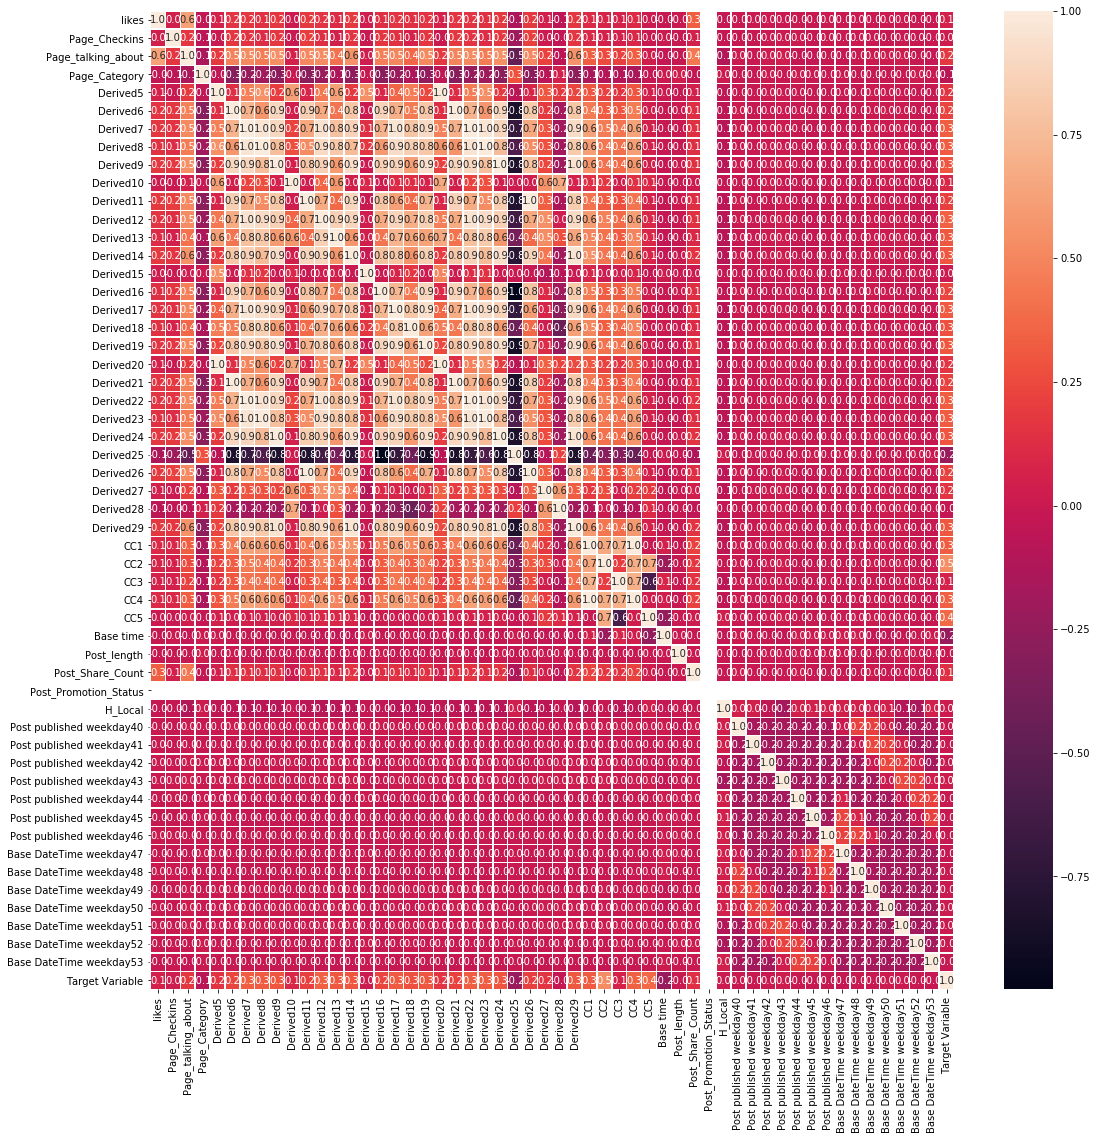

In [10]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(train_data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [26]:
from sklearn import linear_model, metrics 
from sklearn.model_selection import train_test_split 
X = df[['likes','Page_Checkins','Page_talking_about','Page_Category','Derived5','Derived6','Derived7','Derived8','Derived9','Derived10','Derived11','Derived12','Derived13','Derived14','Derived15','Derived16','Derived17','Derived18','Derived19','Derived20','Derived21','Derived22','Derived23','Derived24','Derived25','Derived26','Derived27','Derived28','Derived29','CC1','CC2','CC3','CC4','CC5','Base time','Post_length','Post_Share_Count','Post_Promotion_Status','H_Local','Post published weekday40','Post published weekday41','Post published weekday42','Post published weekday43','Post published weekday44','Post published weekday45','Post published weekday46','Base DateTime weekday47','Base DateTime weekday48','Base DateTime weekday49','Base DateTime weekday50','Base DateTime weekday51','Base DateTime weekday52','Base DateTime weekday53']]
y=df['Target Variable']


In [27]:
#Standardization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_std=sc.fit_transform(x_train)
X_test=sc.transform(x_test)

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=1)

In [1]:
Linear_model = linear_model.LinearRegression() 
Linear_model.fit(x_train, y_train) 

NameError: name 'linear_model' is not defined

In [30]:
print(Linear_model.intercept_)
print(Linear_model.coef_)


-4.0705095914915566
[ 2.21156477e-08 -1.02484859e-05 -2.20919346e-05 -1.00265906e-02
 -8.71770911e-01  2.31100213e-02  1.10749553e+00  2.33430764e-01
 -3.01498343e-01 -2.28744849e-01 -6.18281307e-03 -1.11759747e+07
  1.29930674e-01 -4.61081107e-02  2.39978268e-01  1.50249152e-02
  1.11759750e+07  4.74207374e-02 -1.87203616e-01  8.22408956e-01
 -2.67212153e-02 -1.18585477e+00 -2.54265623e-01  3.82555455e-01
  7.87706475e-04  4.88460686e-03  1.11759749e+07  7.87894789e-02
  1.03383692e-02  5.66171007e-02 -2.28140528e+03  2.28160293e+03
 -8.25644716e-02  2.28162613e+03 -1.95592647e-01 -1.41427287e-04
  2.99711833e-03 -9.17772941e-02  4.21377673e-01  6.99401227e-01
  4.33580600e-02  3.19652190e-01  1.74754181e+00  1.42495455e+00
  1.55452790e+00  5.29715278e-01 -2.20650583e-01  7.13791278e-01
  3.69840464e-01  1.49505092e+00  3.26302065e-01  2.25046912e-01
 -3.38691919e-01]


In [31]:
y_predcited = Linear_model.predict(x_test)
print(y_predcited)

[-14.52167151  11.06989232  17.75963238 ...   0.93787468  -4.47585594
  -3.25964776]


In [37]:
print(metrics.mean_squared_error(y_test,y_predcited))
print(np.sqrt(metrics.mean_squared_error(y_test,y_predcited)))
from sklearn.metrics import r2_score 
print(r2_score(y_test,y_predcited ) )

683.9898870153592
26.153200320713317
0.3249721557274524


In [59]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
tree_reg = tree.DecisionTreeRegressor(max_depth=6)
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [64]:
print(tree_reg.score(x_test,y_test))
y_pred = regressor.predict(x_test)

0.4668900202926899


In [65]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 658.1787545787546


In [72]:
important = tree_reg.feature_importances_
print(important)

[0.00397193 0.01772763 0.         0.01359926 0.         0.
 0.01488895 0.00113686 0.         0.         0.         0.03299475
 0.         0.00158726 0.         0.         0.         0.00129696
 0.00705741 0.         0.00056511 0.         0.0039008  0.03848104
 0.00221231 0.         0.00207135 0.         0.         0.00986966
 0.3490211  0.         0.05910852 0.00177839 0.26648755 0.
 0.16581259 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.0064306  0.         0.         0.        ]


[Text(177.216,208.409,'X[30] <= 169.5\nmse = 1287.217\nsamples = 36853\nvalue = 7.39'),
 Text(88.0507,176.346,'X[34] <= 3.5\nmse = 516.858\nsamples = 35762\nvalue = 4.579'),
 Text(45.3257,144.283,'X[36] <= 168.5\nmse = 6543.302\nsamples = 2037\nvalue = 32.996'),
 Text(23.7774,112.22,'X[6] <= 57.444\nmse = 1571.228\nsamples = 1799\nvalue = 18.172'),
 Text(11.8887,80.1571,'X[29] <= 20.5\nmse = 573.428\nsamples = 1393\nvalue = 8.81'),
 Text(5.94435,48.0943,'X[7] <= 8.75\nmse = 410.263\nsamples = 1299\nvalue = 6.771'),
 Text(2.97217,16.0314,'mse = 33.77\nsamples = 879\nvalue = 2.873'),
 Text(8.91652,16.0314,'mse = 1099.857\nsamples = 420\nvalue = 14.929'),
 Text(17.833,48.0943,'X[24] <= -604.0\nmse = 1976.67\nsamples = 94\nvalue = 36.989'),
 Text(14.8609,16.0314,'mse = 0.0\nsamples = 1\nvalue = 319.0'),
 Text(20.8052,16.0314,'mse = 1133.568\nsamples = 93\nvalue = 33.957'),
 Text(35.6661,80.1571,'X[30] <= 67.5\nmse = 3662.217\nsamples = 406\nvalue = 50.293'),
 Text(29.7217,48.0943,'X[34] <=

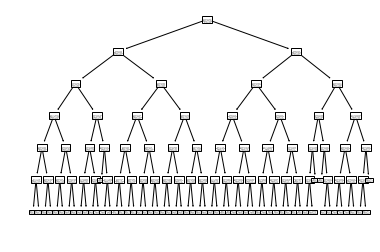

In [73]:
tree.plot_tree(tree_reg)